<img src="https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png">


<img src="https://media2.giphy.com/media/3og0IO5z8Rd30ktV6g/giphy.gif?cid=790b76114b64f0613568d3fbab92ecc7c68ae464d3b3e2b4&rid=giphy.gif&ct=g">

# Kaggle

```
id : 샘플 아이디
Species: 펭귄의 종을 나타내는 문자열
Island : 샘플들이 수집된 Palmer Station 근처 섬 이름
Clutch Completion : 관찰된 펭귄 둥지의 알이 2개인 경우 Full Clutch이며 Yes로 표기
Culmen Length (mm) : 펭귄 옆모습 기준 부리의 가로 길이
Culmen Depth (mm) : 펭귄 옆모습 기준 부리의 세로 길이
Flipper Length (mm) : 펭귄의 팔(날개) 길이
Sex : 펭귄의 성별
Delta 15 N (o/oo)  : 토양에 따라 변화하는 안정 동위원소 15N:14N의 비율
Delta 13 C (o/oo) : 먹이에 따라 변화하는 안정 동위원소 13C:12C의 비율
Body Mass (g): 펭귄의 몸무게를 나타내는 숫자 (g)
```

# Library Import

In [189]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras.optimizers import Adam

# 케라스에서 할 때 필요한 것
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Train / Test split  &  sclaer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt

In [314]:
plt.rcParams['figure.figsize'] = [17, 12]
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['axes.labelsize'] = 12

# Data

In [191]:
df = pd.read_csv('data/penguin.csv',)
df

,Unnamed: 0,Sample Number,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,0,1,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,39.1,18.7,181.0,3750.0,MALE,NaN,NaN
1,1,2,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454
2,2,3,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302
3,3,4,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,5,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426
...,...,...,...,...,...,...,...,...,...,...,...,...
339,339,120,Gentoo penguin (Pygoscelis papua),Biscoe,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,340,121,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832
341,341,122,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117
342,342,123,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969


## 필요없는 columns drop

In [192]:
df.drop(['Unnamed: 0', 'Sample Number'], axis=1, inplace=True)
df

,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,39.1,18.7,181.0,3750.0,MALE,NaN,NaN
1,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454
2,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302
3,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426
...,...,...,...,...,...,...,...,...,...,...
339,Gentoo penguin (Pygoscelis papua),Biscoe,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832
341,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117
342,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969


## 데이터 확인

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              344 non-null    object 
 1   Island               344 non-null    object 
 2   Clutch Completion    344 non-null    object 
 3   Culmen Length (mm)   342 non-null    float64
 4   Culmen Depth (mm)    342 non-null    float64
 5   Flipper Length (mm)  342 non-null    float64
 6   Body Mass (g)        342 non-null    float64
 7   Sex                  334 non-null    object 
 8   Delta 15 N (o/oo)    330 non-null    float64
 9   Delta 13 C (o/oo)    331 non-null    float64
dtypes: float64(6), object(4)
memory usage: 27.0+ KB


In [194]:
for i in list(df.columns):
    print(i)
    print()
    print('값종류 :',df[i].unique())
    print()
    print('길이 :',df[i].unique().shape)
    print('============================')

Species

값종류 : ['Adelie Penguin (Pygoscelis adeliae)'
 'Chinstrap penguin (Pygoscelis antarctica)'
 'Gentoo penguin (Pygoscelis papua)']

길이 : (3,)
Island

값종류 : ['Torgersen' 'Biscoe' 'Dream']

길이 : (3,)
Clutch Completion

값종류 : ['Yes' 'No']

길이 : (2,)
Culmen Length (mm)

값종류 : [39.1 39.5 40.3  nan 36.7 39.3 38.9 39.2 34.1 42.  37.8 41.1 38.6 34.6
 36.6 38.7 42.5 34.4 46.  37.7 35.9 38.2 38.8 35.3 40.6 40.5 37.9 37.2
 40.9 36.4 42.2 37.6 39.8 36.5 40.8 36.  44.1 37.  39.6 37.5 42.3 40.1
 35.  34.5 41.4 39.  35.7 41.3 41.6 35.5 41.8 33.5 39.7 45.8 42.8 36.2
 42.1 42.9 35.1 37.3 36.3 36.9 38.3 34.  38.1 33.1 43.2 41.  45.6 42.7
 40.2 35.2 41.5 38.5 43.1 36.8 35.6 32.1 40.7 46.5 50.  51.3 45.4 52.7
 45.2 46.1 46.6 51.7 47.  52.  45.9 50.5 50.3 58.  46.4 49.2 42.4 48.5
 50.6 46.7 49.5 52.8 54.2 51.  49.7 47.5 47.6 46.9 53.5 49.  46.2 50.9
 45.5 50.8 50.1 51.5 49.8 48.1 51.4 45.7 50.7 52.2 49.3 50.2 51.9 46.8
 55.8 43.5 49.6 48.7 43.3 48.4 45.1 46.3 44.5 47.8 48.2 47.3 59.6 49.1
 42.6 44.4 

### 성별 column에서 문자형 발견 ==> np.nan으로 변경

In [195]:
import numpy as np
df['Sex'].replace('.',np.nan, inplace=True) 

In [196]:
df['Sex'].unique()

array(['MALE', 'FEMALE', nan], dtype=object)

## 수치형 데이터에 대해서 pairplot

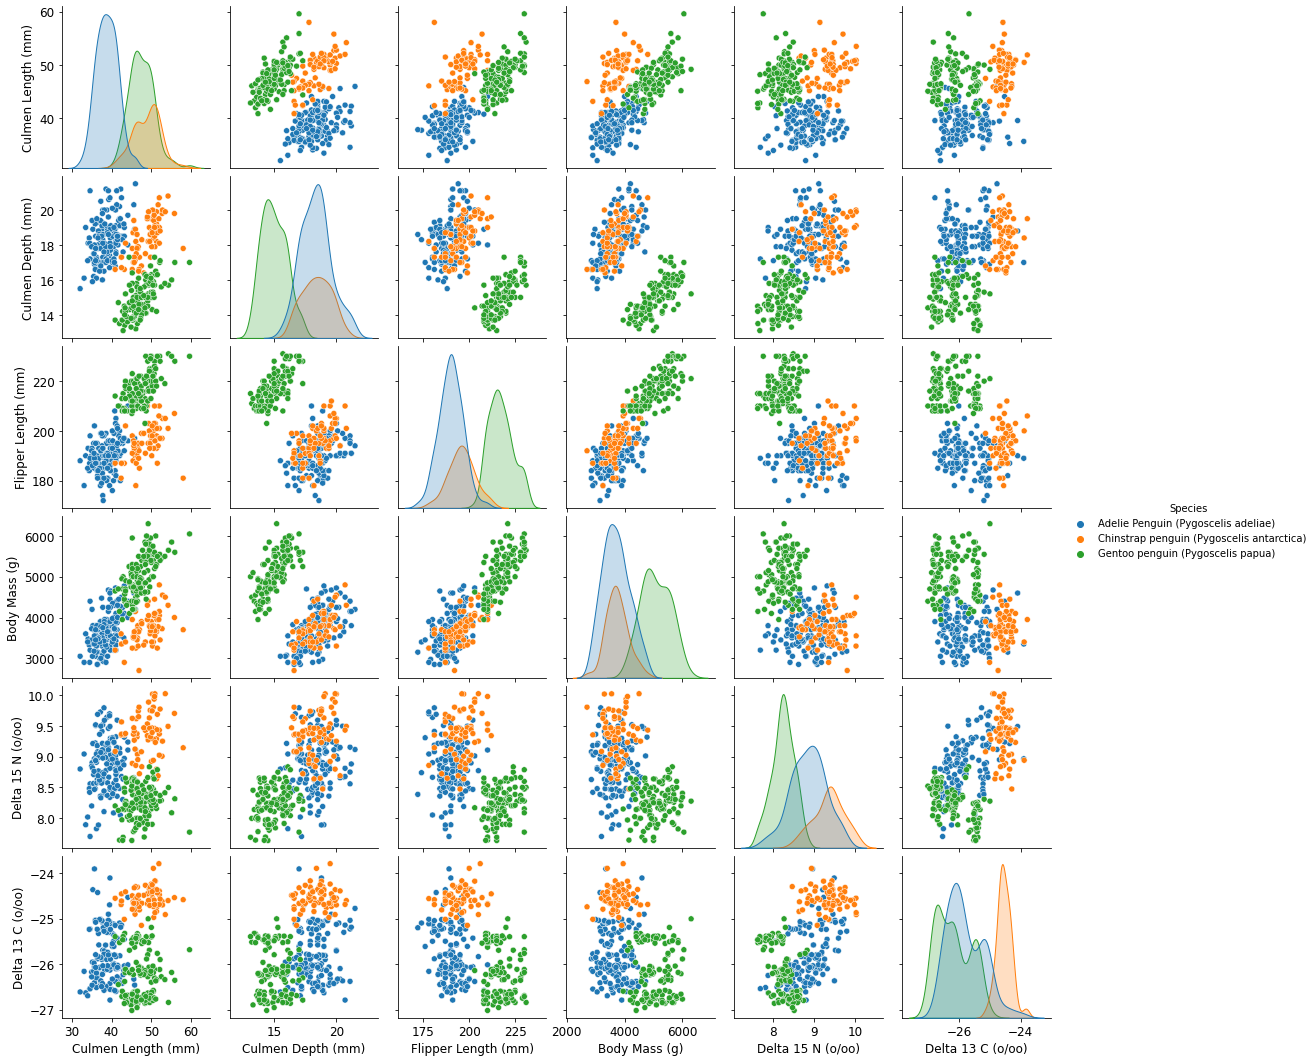

In [318]:
sns.pairplot(df, hue="Species")

In [319]:
df.corr()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
Culmen Length (mm),1.000000,-0.235053,0.656181,0.595110,-0.059759,0.189025
Culmen Depth (mm),-0.235053,1.000000,-0.583851,-0.471916,0.605874,0.429933
Flipper Length (mm),0.656181,-0.583851,1.000000,0.871202,-0.507787,-0.376223
Body Mass (g),0.595110,-0.471916,0.871202,1.000000,-0.537888,-0.374638
Delta 15 N (o/oo),-0.059759,0.605874,-0.507787,-0.537888,1.000000,0.570615
Delta 13 C (o/oo),0.189025,0.429933,-0.376223,-0.374638,0.570615,1.000000


<AxesSubplot:>

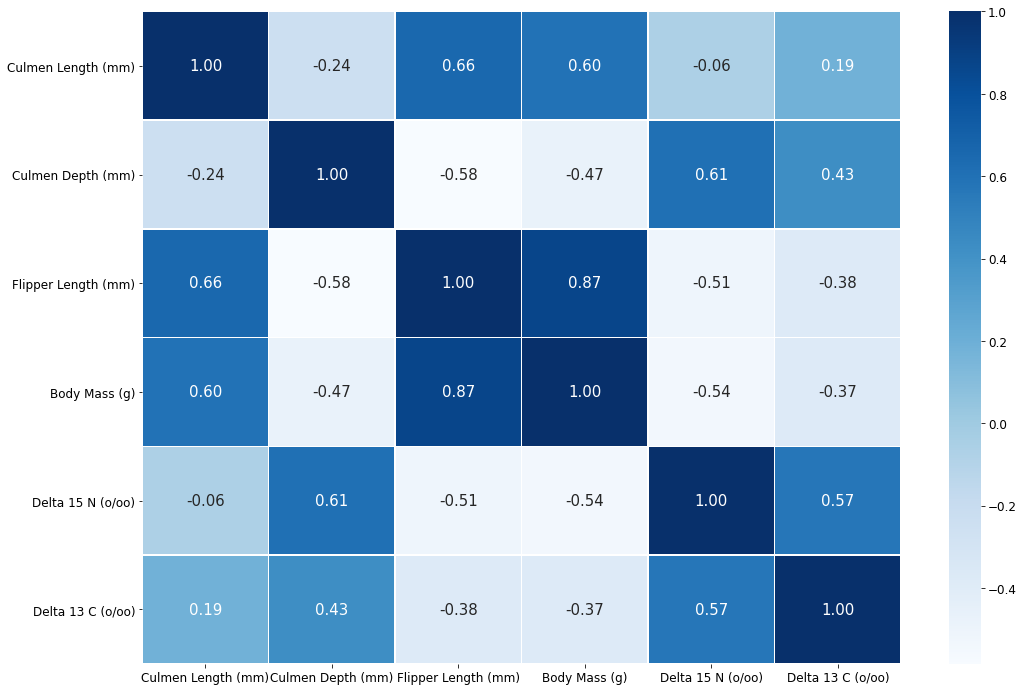

In [322]:
sns.heatmap(df.corr(),annot=True, fmt = '.2f', linewidths=.5, cmap='Blues', annot_kws={"size": 15})

## 결측치 확인

In [197]:
df.isnull().sum()

Species                 0
Island                  0
Clutch Completion       0
Culmen Length (mm)      2
Culmen Depth (mm)       2
Flipper Length (mm)     2
Body Mass (g)           2
Sex                    11
Delta 15 N (o/oo)      14
Delta 13 C (o/oo)      13
dtype: int64

## Species 별로 DataFrame 생성

### Adelie Penguin (Pygoscelis adeliae)

In [198]:
df_adel = df[df['Species'] == "Adelie Penguin (Pygoscelis adeliae)"]
df_adel

,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,39.1,18.7,181.0,3750.0,MALE,NaN,NaN
1,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454
2,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302
3,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426
...,...,...,...,...,...,...,...,...,...,...
147,Adelie Penguin (Pygoscelis adeliae),Dream,Yes,36.6,18.4,184.0,3475.0,FEMALE,8.68744,-25.83060
148,Adelie Penguin (Pygoscelis adeliae),Dream,Yes,36.0,17.8,195.0,3450.0,FEMALE,8.94332,-25.79189
149,Adelie Penguin (Pygoscelis adeliae),Dream,Yes,37.8,18.1,193.0,3750.0,MALE,8.97533,-26.03495
150,Adelie Penguin (Pygoscelis adeliae),Dream,Yes,36.0,17.1,187.0,3700.0,FEMALE,8.93465,-26.07081


### Chinstrap penguin (Pygoscelis antarctica)

In [199]:
df_chin = df[df['Species'] == "Chinstrap penguin (Pygoscelis antarctica)"]
df_chin

,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
152,Chinstrap penguin (Pygoscelis antarctica),Dream,No,46.5,17.9,192.0,3500.0,FEMALE,9.03935,-24.30229
153,Chinstrap penguin (Pygoscelis antarctica),Dream,No,50.0,19.5,196.0,3900.0,MALE,8.92069,-24.23592
154,Chinstrap penguin (Pygoscelis antarctica),Dream,Yes,51.3,19.2,193.0,3650.0,MALE,9.29078,-24.75570
155,Chinstrap penguin (Pygoscelis antarctica),Dream,Yes,45.4,18.7,188.0,3525.0,FEMALE,8.64701,-24.62717
156,Chinstrap penguin (Pygoscelis antarctica),Dream,Yes,52.7,19.8,197.0,3725.0,MALE,9.00642,-24.61867
...,...,...,...,...,...,...,...,...,...,...
215,Chinstrap penguin (Pygoscelis antarctica),Dream,Yes,55.8,19.8,207.0,4000.0,MALE,9.70465,-24.53494
216,Chinstrap penguin (Pygoscelis antarctica),Dream,No,43.5,18.1,202.0,3400.0,FEMALE,9.37608,-24.40753
217,Chinstrap penguin (Pygoscelis antarctica),Dream,No,49.6,18.2,193.0,3775.0,MALE,9.46180,-24.70615
218,Chinstrap penguin (Pygoscelis antarctica),Dream,Yes,50.8,19.0,210.0,4100.0,MALE,9.98044,-24.68741


### Gentoo penguin (Pygoscelis papua)

In [200]:
df_gent = df[df['Species'] == "Gentoo penguin (Pygoscelis papua)"]
df_gent

,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
220,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,46.1,13.2,211.0,4500.0,FEMALE,7.99300,-25.51390
221,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,50.0,16.3,230.0,5700.0,MALE,8.14756,-25.39369
222,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,48.7,14.1,210.0,4450.0,FEMALE,8.14705,-25.46172
223,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,50.0,15.2,218.0,5700.0,MALE,8.25540,-25.40075
224,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,47.6,14.5,215.0,5400.0,MALE,8.23450,-25.54456
...,...,...,...,...,...,...,...,...,...,...
339,Gentoo penguin (Pygoscelis papua),Biscoe,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832
341,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117
342,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969


# EDA

## species별로 feature 이상치 탐색

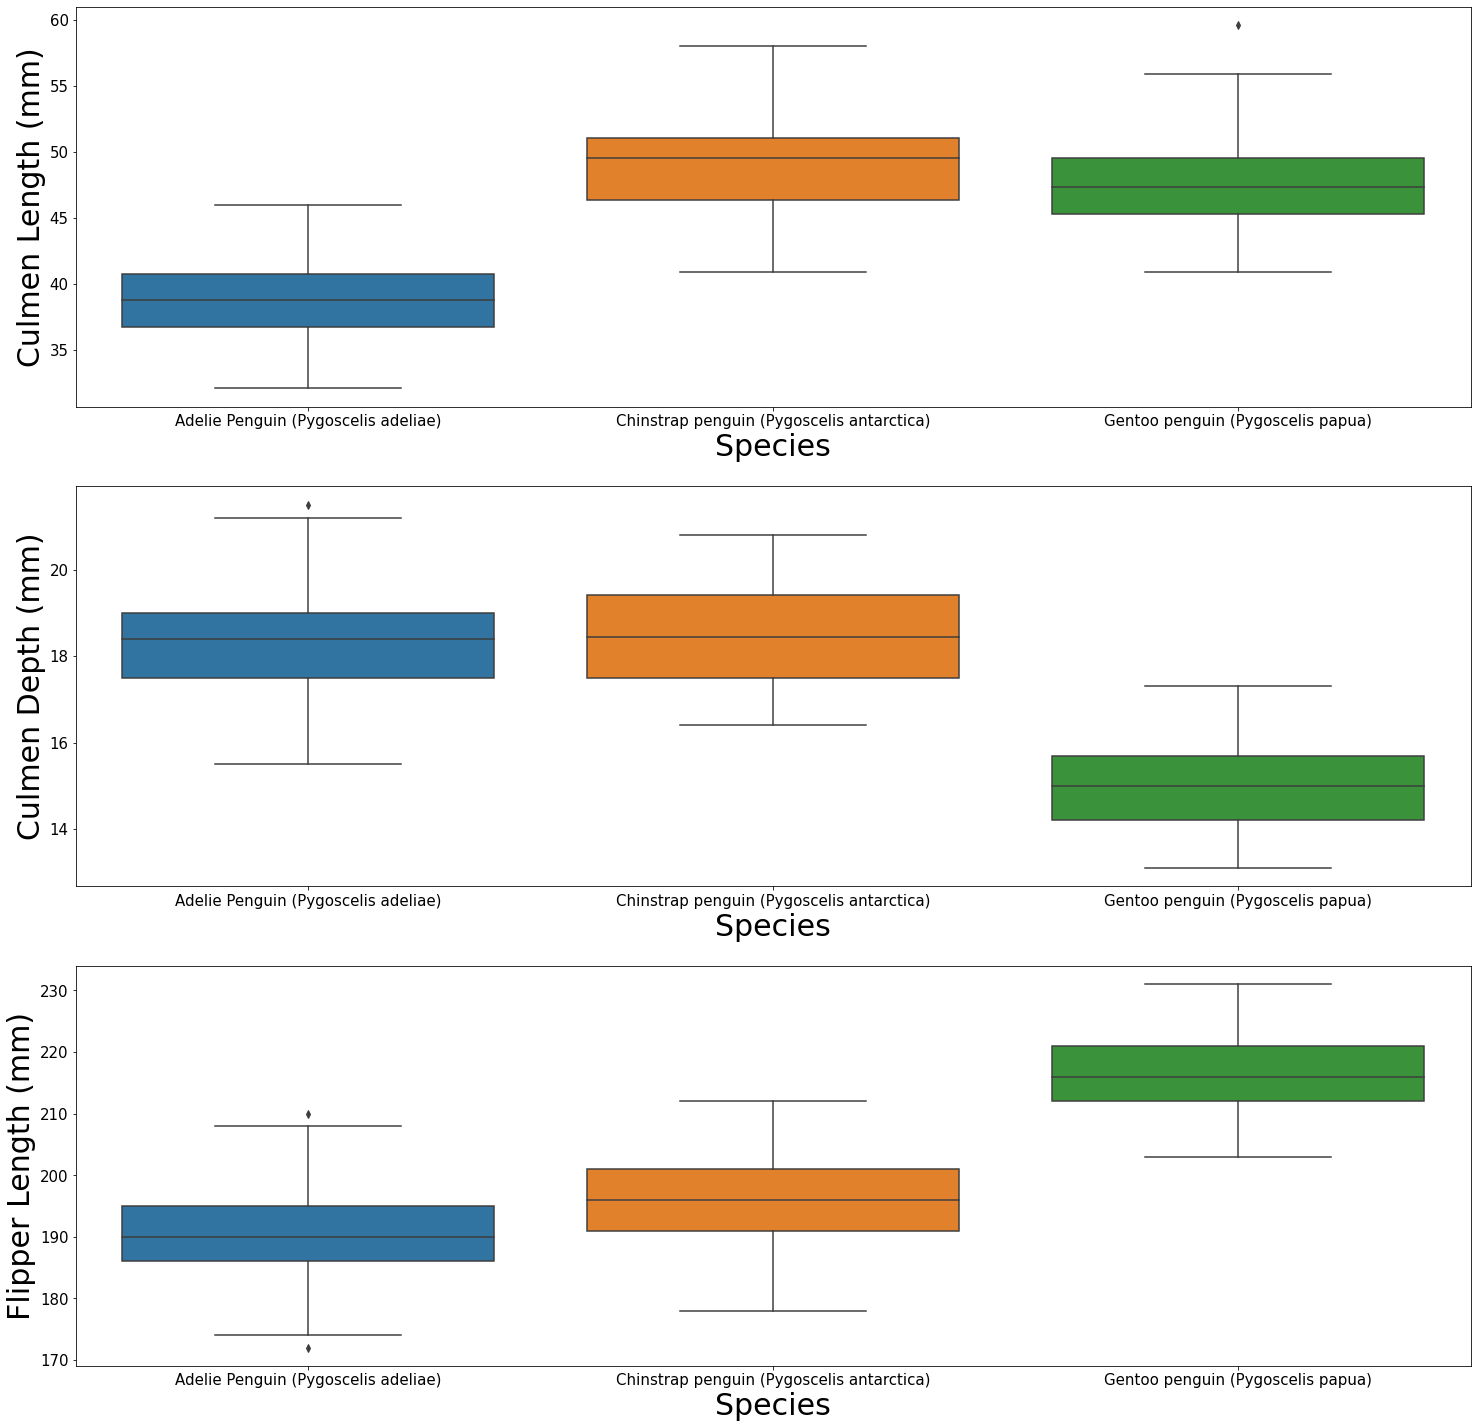

In [201]:
plt.subplot(311)
sns.boxplot(x="Species", y="Culmen Length (mm)", data=df)

plt.subplot(312)
sns.boxplot(x="Species", y="Culmen Depth (mm)", data=df)

plt.subplot(313)
sns.boxplot(x="Species", y="Flipper Length (mm)", data=df)


plt.savefig("box1.png", dpi=50)
plt.show()

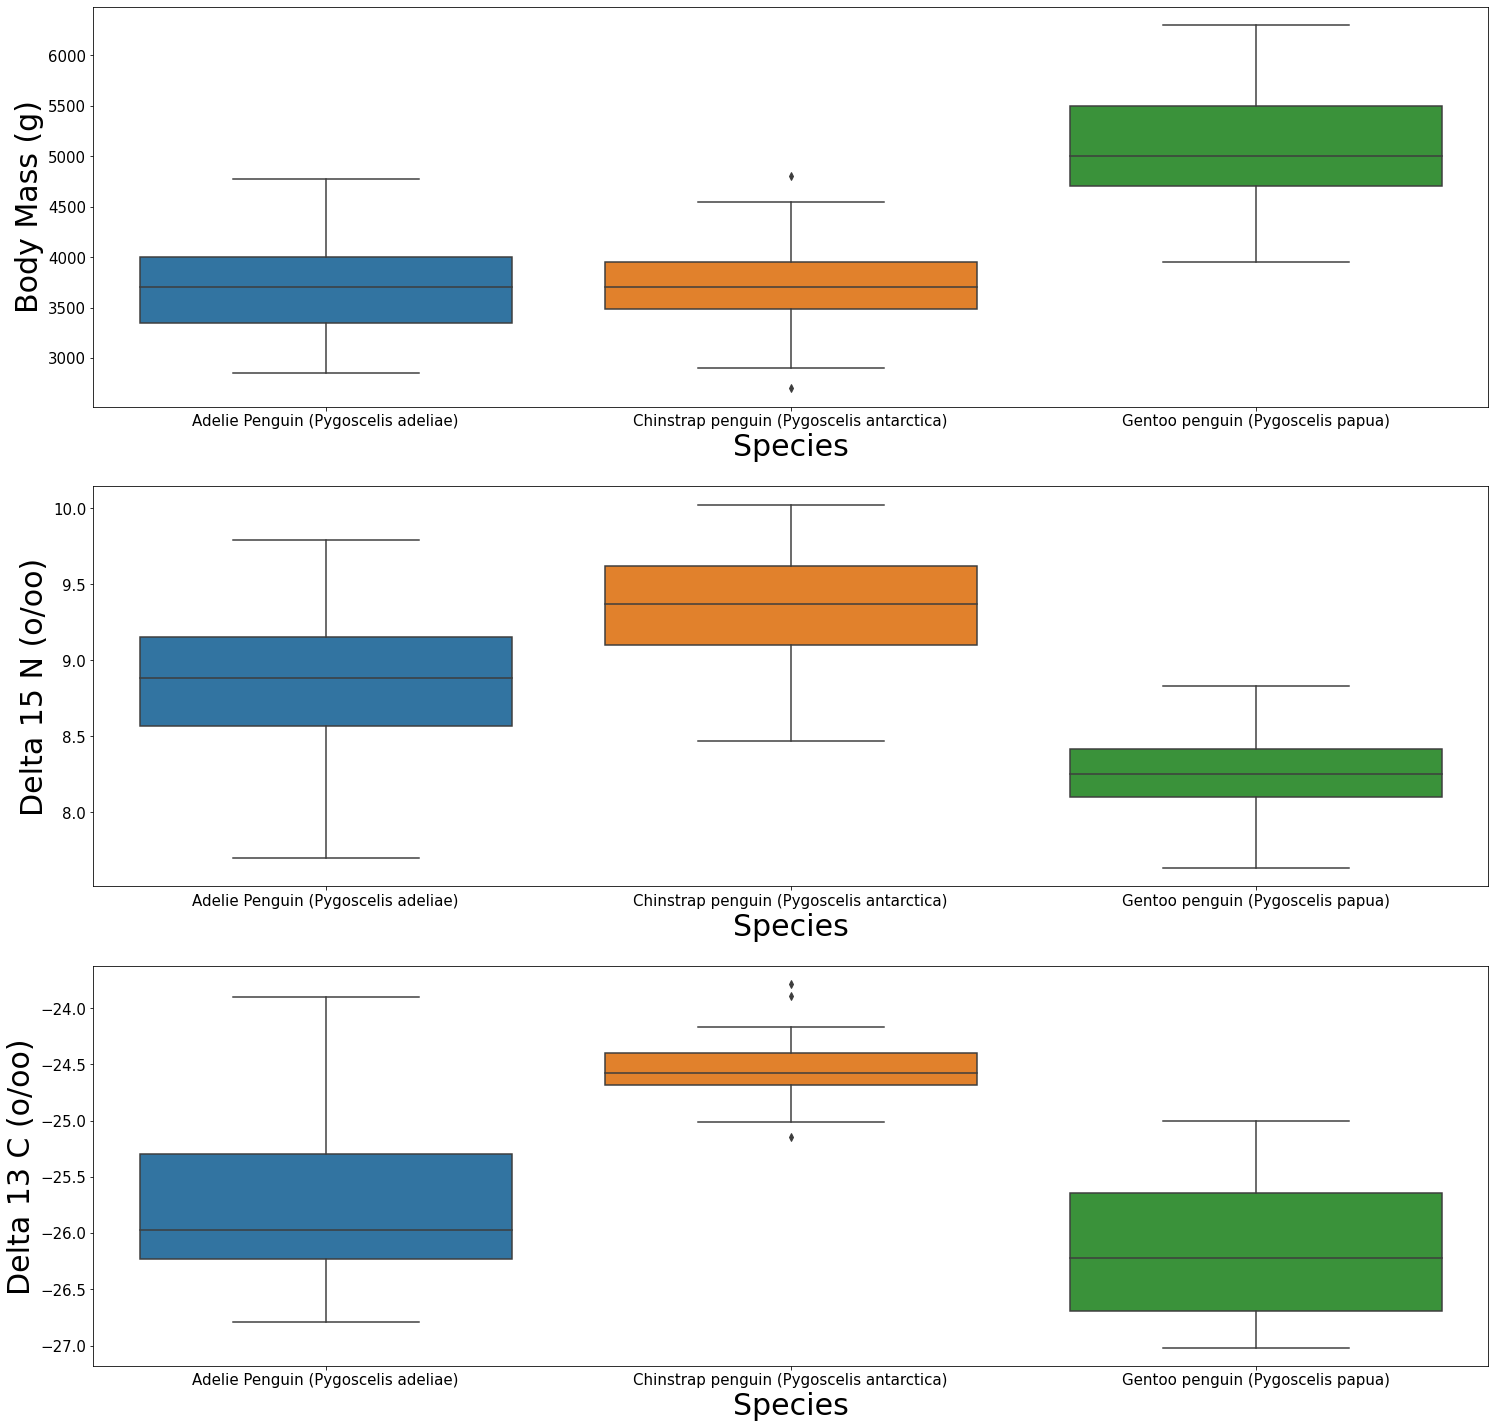

In [202]:
plt.subplot(311)
sns.boxplot(x="Species", y="Body Mass (g)", data=df)

plt.subplot(312)
sns.boxplot(x="Species", y="Delta 15 N (o/oo)", data=df)

plt.subplot(313)
sns.boxplot(x="Species", y="Delta 13 C (o/oo)", data=df)


plt.savefig("box2.png", dpi=50)
plt.show()

### Species별 이상치 갯수 확인

#### 이상치 인덱스 반환하는 함수

In [203]:
def outliers_iqr(data):
    q1, q3 = np.percentile(data, [25,75])
    
    iqr = q3 - q1
    lower_bound = q1 - (iqr*1.5)
    upper_bound = q3 + (iqr*1.5)
    
    return np.where((data>upper_bound) | (data<lower_bound))

####  Adelie Penguin (Pygoscelis adeliae)

```
아델리 이상치 없음
```

In [204]:
col = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']

for i in col: 
    adel_outlier_index = outliers_iqr(df_adel[i])[0]
    
    if len(adel_outlier_index) > 0:
        print("adel "+i+" 이상치 갯수:", len(adel_outlier_index))
        print("adel "+i+" 이상치 index:",  adel_outlier_index)
    else:
         print("adel "+i+" 는 이상치가 없습니다.")

adel Culmen Length (mm) 는 이상치가 없습니다.
adel Culmen Depth (mm) 는 이상치가 없습니다.
adel Flipper Length (mm) 는 이상치가 없습니다.
adel Body Mass (g) 는 이상치가 없습니다.
adel Delta 15 N (o/oo) 는 이상치가 없습니다.
adel Delta 13 C (o/oo) 는 이상치가 없습니다.


#### Chinstrap penguin (Pygoscelis antarctica)

```
chin 에서 이상치 5개가 발견됨 ==> 수치형 데이터를 평균으로 imputation할 것이기 때문에 outlier 제거
```

In [205]:
col = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']

for i in col: 
    chin_outlier_index = outliers_iqr(df_chin[i])[0]
    
    if len(chin_outlier_index) > 0:
        print("chin "+i+" 이상치 갯수:", len(chin_outlier_index))
        print("chin "+i+" 이상치 index:", chin_outlier_index)
        print()
    else:
        continue

chin Body Mass (g) 이상치 갯수: 2
chin Body Mass (g) 이상치 index: [37 38]

chin Delta 13 C (o/oo) 이상치 갯수: 3
chin Delta 13 C (o/oo) 이상치 index: [26 35 60]



#### 확인

In [206]:
df_chin.iloc[37:39,:]

,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
189,Chinstrap penguin (Pygoscelis antarctica),Dream,Yes,52.0,20.7,210.0,4800.0,MALE,9.43146,-24.68440
190,Chinstrap penguin (Pygoscelis antarctica),Dream,No,46.9,16.6,192.0,2700.0,FEMALE,9.80589,-24.73735


In [207]:
df_chin.iloc[[26,35,60],:]

,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
178,Chinstrap penguin (Pygoscelis antarctica),Dream,No,50.5,18.4,200.0,3400.0,FEMALE,8.93990,-23.89017
187,Chinstrap penguin (Pygoscelis antarctica),Dream,Yes,47.5,16.8,199.0,3900.0,FEMALE,9.07825,-25.14550
212,Chinstrap penguin (Pygoscelis antarctica),Dream,Yes,51.9,19.5,206.0,3950.0,MALE,NaN,-23.78767


#### Gentoo penguin (Pygoscelis papua)

In [208]:
col = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']

for i in col: 
    gent_outlier_index = outliers_iqr(df_gent[i])[0]
    
    if len(gent_outlier_index) > 0:
        print("chin "+i+" 이상치 갯수:", len(gent_outlier_index))
        print("chin "+i+" 이상치 index:", gent_outlier_index)
        print()
    else:
        print("chin "+i+" 는 이상치가 없습니다.")

chin Culmen Length (mm) 는 이상치가 없습니다.
chin Culmen Depth (mm) 는 이상치가 없습니다.
chin Flipper Length (mm) 는 이상치가 없습니다.
chin Body Mass (g) 는 이상치가 없습니다.
chin Delta 15 N (o/oo) 는 이상치가 없습니다.
chin Delta 13 C (o/oo) 는 이상치가 없습니다.


## 이상치 제거

In [209]:
df2 = df.drop([178,187,189,190,212])
df2.reset_index(drop=True, inplace=True)
df2

,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,39.1,18.7,181.0,3750.0,MALE,NaN,NaN
1,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454
2,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302
3,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426
...,...,...,...,...,...,...,...,...,...,...
334,Gentoo penguin (Pygoscelis papua),Biscoe,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
335,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832
336,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117
337,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969


## 결측치 imputation

In [210]:
df2.isnull().sum()

Species                 0
Island                  0
Clutch Completion       0
Culmen Length (mm)      2
Culmen Depth (mm)       2
Flipper Length (mm)     2
Body Mass (g)           2
Sex                    11
Delta 15 N (o/oo)      13
Delta 13 C (o/oo)      13
dtype: int64

In [211]:
df2[df2['Culmen Length (mm)'].isnull()]

,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
3,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
334,Gentoo penguin (Pygoscelis papua),Biscoe,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2개의 행에서 중요한 feature들이 모두 null값이어서 의미 없는 관측치라고 판단 & 2개여서 적음 ==> 제거

In [212]:
df3 = df2.drop(df2[df2['Culmen Length (mm)'].isnull()].index.values)
df3.reset_index(drop=True, inplace=True)
df3

,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,39.1,18.7,181.0,3750.0,MALE,NaN,NaN
1,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454
2,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302
3,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426
4,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,39.3,20.6,190.0,3650.0,MALE,8.66496,-25.29805
...,...,...,...,...,...,...,...,...,...,...
332,Gentoo penguin (Pygoscelis papua),Biscoe,No,47.2,13.7,214.0,4925.0,FEMALE,7.99184,-26.20538
333,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832
334,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117
335,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969


#### 제거 확인

In [213]:
df3.isnull().sum()

Species                 0
Island                  0
Clutch Completion       0
Culmen Length (mm)      0
Culmen Depth (mm)       0
Flipper Length (mm)     0
Body Mass (g)           0
Sex                     9
Delta 15 N (o/oo)      11
Delta 13 C (o/oo)      11
dtype: int64

In [214]:
df3.iloc[df3[df3['Delta 15 N (o/oo)'].isnull()].index,:]

,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,39.1,18.7,181.0,3750.0,MALE,NaN,NaN
7,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,34.1,18.1,193.0,3475.0,NaN,NaN,NaN
10,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,37.8,17.3,180.0,3700.0,NaN,NaN,NaN
11,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,41.1,17.6,182.0,3200.0,FEMALE,NaN,NaN
12,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,38.6,21.2,191.0,3800.0,MALE,NaN,NaN
14,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,36.6,17.8,185.0,3700.0,FEMALE,NaN,NaN
38,Adelie Penguin (Pygoscelis adeliae),Dream,No,39.8,19.1,184.0,4650.0,MALE,NaN,NaN
40,Adelie Penguin (Pygoscelis adeliae),Dream,Yes,40.8,18.4,195.0,3900.0,MALE,NaN,NaN
45,Adelie Penguin (Pygoscelis adeliae),Dream,Yes,41.1,19.0,182.0,3425.0,MALE,NaN,NaN
46,Adelie Penguin (Pygoscelis adeliae),Dream,Yes,37.5,18.9,179.0,2975.0,NaN,NaN,NaN


In [215]:
ind = df3[df3['Delta 15 N (o/oo)'].isnull()].index
ind

Int64Index([0, 7, 10, 11, 12, 14, 38, 40, 45, 46, 244], dtype='int64')

### Delta 15 N (o/oo)  ==> Island 그룹별로 imputation

In [216]:
df3.groupby(by='Island')['Delta 13 C (o/oo)'].mean()

Island
Biscoe      -26.114634
Dream       -25.093800
Torgersen   -25.757806
Name: Delta 13 C (o/oo), dtype: float64

In [217]:
df3.loc[(df3['Delta 15 N (o/oo)'].isnull()) & (df3['Island']=='Biscoe'), ['Delta 15 N (o/oo)']] = df3.groupby(by='Island')['Delta 15 N (o/oo)'].mean()['Biscoe']
df3.loc[(df3['Delta 15 N (o/oo)'].isnull()) & (df3['Island']=='Dream'), ['Delta 15 N (o/oo)']] = df3.groupby(by='Island')['Delta 15 N (o/oo)'].mean()['Dream']
df3.loc[(df3['Delta 15 N (o/oo)'].isnull()) & (df3['Island']=='Torgersen'), ['Delta 15 N (o/oo)']] = df3.groupby(by='Island')['Delta 15 N (o/oo)'].mean()['Torgersen']

#### 확인

In [218]:
df3.iloc[ind,:]

,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,39.1,18.7,181.0,3750.0,MALE,8.792753,NaN
7,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,34.1,18.1,193.0,3475.0,NaN,8.792753,NaN
10,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,37.8,17.3,180.0,3700.0,NaN,8.792753,NaN
11,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,41.1,17.6,182.0,3200.0,FEMALE,8.792753,NaN
12,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,38.6,21.2,191.0,3800.0,MALE,8.792753,NaN
14,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,36.6,17.8,185.0,3700.0,FEMALE,8.792753,NaN
38,Adelie Penguin (Pygoscelis adeliae),Dream,No,39.8,19.1,184.0,4650.0,MALE,9.173193,NaN
40,Adelie Penguin (Pygoscelis adeliae),Dream,Yes,40.8,18.4,195.0,3900.0,MALE,9.173193,NaN
45,Adelie Penguin (Pygoscelis adeliae),Dream,Yes,41.1,19.0,182.0,3425.0,MALE,9.173193,NaN
46,Adelie Penguin (Pygoscelis adeliae),Dream,Yes,37.5,18.9,179.0,2975.0,NaN,9.173193,NaN


### Delta 13 C (o/oo) ==> Island 그룹별로 imputation

In [219]:
df3.loc[(df3['Delta 13 C (o/oo)'].isnull()) & (df3['Island']=='Biscoe'), ['Delta 13 C (o/oo)']] = df3.groupby(by='Island')['Delta 13 C (o/oo)'].mean()['Biscoe']
df3.loc[(df3['Delta 13 C (o/oo)'].isnull()) & (df3['Island']=='Dream'), ['Delta 13 C (o/oo)'] ] = df3.groupby(by='Island')['Delta 13 C (o/oo)'].mean()['Dream']
df3.loc[(df3['Delta 13 C (o/oo)'].isnull()) & (df3['Island']=='Torgersen'), ['Delta 13 C (o/oo)']] = df3.groupby(by='Island')['Delta 13 C (o/oo)'].mean()['Torgersen']

#### 확인

In [220]:
df3.iloc[ind,:]

,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,39.1,18.7,181.0,3750.0,MALE,8.792753,-25.757806
7,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,34.1,18.1,193.0,3475.0,NaN,8.792753,-25.757806
10,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,37.8,17.3,180.0,3700.0,NaN,8.792753,-25.757806
11,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,41.1,17.6,182.0,3200.0,FEMALE,8.792753,-25.757806
12,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,38.6,21.2,191.0,3800.0,MALE,8.792753,-25.757806
14,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,36.6,17.8,185.0,3700.0,FEMALE,8.792753,-25.757806
38,Adelie Penguin (Pygoscelis adeliae),Dream,No,39.8,19.1,184.0,4650.0,MALE,9.173193,-25.093800
40,Adelie Penguin (Pygoscelis adeliae),Dream,Yes,40.8,18.4,195.0,3900.0,MALE,9.173193,-25.093800
45,Adelie Penguin (Pygoscelis adeliae),Dream,Yes,41.1,19.0,182.0,3425.0,MALE,9.173193,-25.093800
46,Adelie Penguin (Pygoscelis adeliae),Dream,Yes,37.5,18.9,179.0,2975.0,NaN,9.173193,-25.093800


### 범주형 변수인 성별(Sex) imputation

```
성별을 기준으로 각각의 feature들을 비교했을 때, "Body Mass"의 가장 차이가 커서 분류하기에 적합한 기준이라고 판단
==> 1) 종별에 따라 성별로 "Body Mass"의 평균을 구해서 기준으로 삼음
==> 2) 성별이 결측인 관측치의 "Body Mass"와의 차이가 더 작은 성별로 imputation
```

In [221]:
#a = Adelie , Male 평균 Mass
a = df3.groupby(by=['Species','Sex'])['Body Mass (g)'].mean().values[1]
#b = Adelie , Female 평균 Mass
b= df3.groupby(by=['Species','Sex'])['Body Mass (g)'].mean().values[0]
#c = Chinstrap ,Male 평균
c= df3.groupby(by=['Species','Sex'])['Body Mass (g)'].mean().values[3]
#d = Chinstrap ,Female 평균
d = df3.groupby(by=['Species','Sex'])['Body Mass (g)'].mean().values[2]
#e = Gentoo  ,Male 평균
e= df3.groupby(by=['Species','Sex'])['Body Mass (g)'].mean().values[5]
#f = Gentoo,Female 평균
f = df3.groupby(by=['Species','Sex'])['Body Mass (g)'].mean().values[4]

df3.loc[( df3['Sex'].isnull() ) & (df3['Species']=='Adelie Penguin (Pygoscelis adeliae)') & (abs(df3['Body Mass (g)']-a )<abs(df3['Body Mass (g)']-b)) , ['Sex']] = 'MALE'
df3.loc[( df3['Sex'].isnull() ) & (df3['Species']=='Adelie Penguin (Pygoscelis adeliae)') & (abs(df3['Body Mass (g)']-a )>=abs(df3['Body Mass (g)']-b)) , ['Sex']] = 'FEMALE'

df3.loc[( df3['Sex'].isnull() ) & (df3['Species']=='Chinstrap penguin (Pygoscelis antarctica)') & (abs(df3['Body Mass (g)']-c )<abs(df3['Body Mass (g)']-d)) , ['Sex']] = 'MALE'
df3.loc[( df3['Sex'].isnull() ) & (df3['Species']=='Chinstrap penguin (Pygoscelis antarctica)') & (abs(df3['Body Mass (g)']-c )>=abs(df3['Body Mass (g)']-d)) , ['Sex']] = 'FEMALE'

df3.loc[( df3['Sex'].isnull() ) & (df3['Species']=='Gentoo penguin (Pygoscelis papua)') & (abs(df3['Body Mass (g)']-e )<abs(df3['Body Mass (g)']-f)) , ['Sex']] = 'MALE'
df3.loc[( df3['Sex'].isnull() ) & (df3['Species']=='Gentoo penguin (Pygoscelis papua)') & (abs(df3['Body Mass (g)']-e )>=abs(df3['Body Mass (g)']-f)) , ['Sex']] = 'FEMALE'

### 결측치 최종 확인

In [222]:
df3.isnull().sum()

Species                0
Island                 0
Clutch Completion      0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Body Mass (g)          0
Sex                    0
Delta 15 N (o/oo)      0
Delta 13 C (o/oo)      0
dtype: int64

In [223]:
df3['Sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

## Modeing

### Scaling

In [224]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline

In [229]:
x_data_num = df3[["Culmen Length (mm)", "Culmen Depth (mm)", "Flipper Length (mm)", "Body Mass (g)", "Delta 15 N (o/oo)", "Delta 13 C (o/oo)"]]
x_data_num

scaler = MinMaxScaler()
scal_x_data = scaler.fit_transform(x_data_num)
scal_x_data = pd.DataFrame(scal_x_data, columns=x_data_num.columns)
scal_x_data

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
0,0.254545,0.666667,0.152542,0.260870,0.484929,0.404672
1,0.269091,0.511905,0.237288,0.275362,0.550450,0.745960
2,0.298182,0.583333,0.389831,0.115942,0.307537,0.541020
3,0.167273,0.738095,0.355932,0.173913,0.473964,0.543832
4,0.261818,0.892857,0.305085,0.231884,0.431532,0.552244
...,...,...,...,...,...,...
332,0.549091,0.071429,0.711864,0.601449,0.150273,0.261009
333,0.534545,0.142857,0.728814,0.579710,0.325630,0.282534
334,0.665455,0.309524,0.847458,0.840580,0.279730,0.313717
335,0.476364,0.202381,0.677966,0.681159,0.254993,0.288514


In [226]:
x_data_cate = df3[["Island", "Clutch Completion", "Sex"]]
x_data_cate

,Island,Clutch Completion,Sex
0,Torgersen,Yes,MALE
1,Torgersen,Yes,FEMALE
2,Torgersen,Yes,FEMALE
3,Torgersen,Yes,FEMALE
4,Torgersen,Yes,MALE
...,...,...,...
332,Biscoe,No,FEMALE
333,Biscoe,Yes,FEMALE
334,Biscoe,Yes,MALE
335,Biscoe,Yes,FEMALE


In [227]:
pd.get_dummies(x_data_cate)

,Island_Biscoe,Island_Dream,Island_Torgersen,Clutch Completion_No,Clutch Completion_Yes,Sex_FEMALE,Sex_MALE
0,0,0,1,0,1,0,1
1,0,0,1,0,1,1,0
2,0,0,1,0,1,1,0
3,0,0,1,0,1,1,0
4,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...
332,1,0,0,1,0,1,0
333,1,0,0,0,1,1,0
334,1,0,0,0,1,0,1
335,1,0,0,0,1,1,0


In [230]:
x_data = pd.concat([scal_x_data, pd.get_dummies(x_data_cate)], axis=1)
x_data

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Island_Biscoe,Island_Dream,Island_Torgersen,Clutch Completion_No,Clutch Completion_Yes,Sex_FEMALE,Sex_MALE
0,0.254545,0.666667,0.152542,0.260870,0.484929,0.404672,0,0,1,0,1,0,1
1,0.269091,0.511905,0.237288,0.275362,0.550450,0.745960,0,0,1,0,1,1,0
2,0.298182,0.583333,0.389831,0.115942,0.307537,0.541020,0,0,1,0,1,1,0
3,0.167273,0.738095,0.355932,0.173913,0.473964,0.543832,0,0,1,0,1,1,0
4,0.261818,0.892857,0.305085,0.231884,0.431532,0.552244,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,0.549091,0.071429,0.711864,0.601449,0.150273,0.261009,1,0,0,1,0,1,0
333,0.534545,0.142857,0.728814,0.579710,0.325630,0.282534,1,0,0,0,1,1,0
334,0.665455,0.309524,0.847458,0.840580,0.279730,0.313717,1,0,0,0,1,0,1
335,0.476364,0.202381,0.677966,0.681159,0.254993,0.288514,1,0,0,0,1,1,0


In [231]:
y_data = pd.get_dummies(df3[['Species']])
y_data

,Species_Adelie Penguin (Pygoscelis adeliae),Species_Chinstrap penguin (Pygoscelis antarctica),Species_Gentoo penguin (Pygoscelis papua)
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
332,0,0,1
333,0,0,1
334,0,0,1
335,0,0,1


### Train / Test split

In [242]:
from sklearn.model_selection import train_test_split

In [243]:
x_train,x_test,y_train,y_test=train_test_split(x_data, y_data, test_size=0.3, stratify=y_data)

In [244]:
x_train,x_valid,y_train,y_valid=train_test_split(x_train, y_train, test_size=0.2, stratify=y_train)

### Tensor version

In [300]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score, plot_roc_curve

In [285]:
x_train = tf.constant(x_train, tf.float32)
y_train = tf.constant(y_train, tf.float32)

In [286]:
initX = tf.initializers.GlorotUniform()
w = tf.Variable(initX(shape=[13,3]), tf.float32)
b = tf.Variable(initX(shape = [3]), tf.float32)

In [287]:
def compute_loss():
    z = tf.matmul(x_train, w) + b
    cost_i = tf.nn.softmax_cross_entropy_with_logits( labels=y_train , logits= z)
    cost = tf.reduce_mean( cost_i )
    return cost

In [288]:
patience = 20
min_delta = 0.01
hist_cost = [] # [10,9]
pcnt = 0
optimizer =Adam(0.1)
for i in range( 10000):
    optimizer.minimize( compute_loss, var_list=[w,b] )
    c = compute_loss().numpy()
    hist_cost.append( c )
    print( i, "cost:", c )
    if i>0:
        if hist_cost[i-1]-hist_cost[i] > min_delta:
            pcnt = 0
        else:
            pcnt+=1

        if pcnt>=patience:
            print( 'early stop ')
            break

0 cost: 0.95974237
1 cost: 0.808296
2 cost: 0.7517449
3 cost: 0.6802714
4 cost: 0.5837463
5 cost: 0.49467728
6 cost: 0.4388099
7 cost: 0.4138816
8 cost: 0.40035918
9 cost: 0.383162
10 cost: 0.35905918
11 cost: 0.3324887
12 cost: 0.30934018
13 cost: 0.29249632
14 cost: 0.28059593
15 cost: 0.27008346
16 cost: 0.25824958
17 cost: 0.24477683
18 cost: 0.23130563
19 cost: 0.21986641
20 cost: 0.21132712
21 cost: 0.2048807
22 cost: 0.19882187
23 cost: 0.19181442
24 cost: 0.18363152
25 cost: 0.17504197
26 cost: 0.1671569
27 cost: 0.16072345
28 cost: 0.15574731
29 cost: 0.15161042
30 cost: 0.14754997
31 cost: 0.14314239
32 cost: 0.13847597
33 cost: 0.13396217
34 cost: 0.12998535
35 cost: 0.12665004
36 cost: 0.123761624
37 cost: 0.12099768
38 cost: 0.11811868
39 cost: 0.11508422
early stop 


In [289]:
def hxfn( xdata):
    xd = tf.constant( xdata, tf.float32)
    z = tf.matmul(xd, w) + b
    hx = tf.nn.softmax(z)
    return (hx.numpy() > 0.5) + 0

### 평가

#### 정확도

In [290]:
y_pred = hxfn(x_test).argmax(axis=1)
y_pred

array([0, 1, 0, 2, 0, 1, 2, 0, 1, 1, 2, 2, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0,
       0, 2, 2, 1, 2, 2, 0, 0, 2, 2, 1, 0, 0, 0, 0, 2, 0, 1, 1, 2, 0, 0,
       2, 1, 2, 0, 0, 0, 0, 2, 0, 1, 2, 2, 1, 0, 2, 0, 0, 2, 0, 0, 2, 0,
       0, 1, 0, 0, 2, 2, 0, 0, 0, 1, 1, 2, 1, 0, 0, 2, 2, 2, 2, 2, 0, 1,
       2, 0, 0, 2, 0, 2, 0, 0, 2, 1, 1, 2, 2, 2], dtype=int64)

In [291]:
y_true=y_test.values.argmax(axis=1)
y_true

array([0, 1, 0, 2, 0, 1, 2, 0, 1, 1, 2, 2, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0,
       0, 2, 2, 1, 2, 2, 0, 0, 2, 2, 1, 0, 0, 0, 0, 2, 0, 1, 1, 2, 0, 0,
       2, 1, 2, 0, 0, 0, 0, 2, 0, 1, 2, 2, 1, 0, 2, 0, 0, 2, 0, 0, 2, 0,
       0, 1, 0, 0, 2, 2, 0, 0, 0, 1, 1, 2, 1, 0, 0, 2, 2, 2, 2, 2, 0, 1,
       2, 0, 0, 2, 0, 2, 0, 0, 2, 1, 1, 2, 2, 2], dtype=int64)

In [293]:
accuracy_score(y_true, y_pred)

1.0

#### Confusion Matrix

In [294]:
cm=confusion_matrix(y_true, y_pred)
cm

array([[46,  0,  0],
       [ 0, 19,  0],
       [ 0,  0, 37]], dtype=int64)

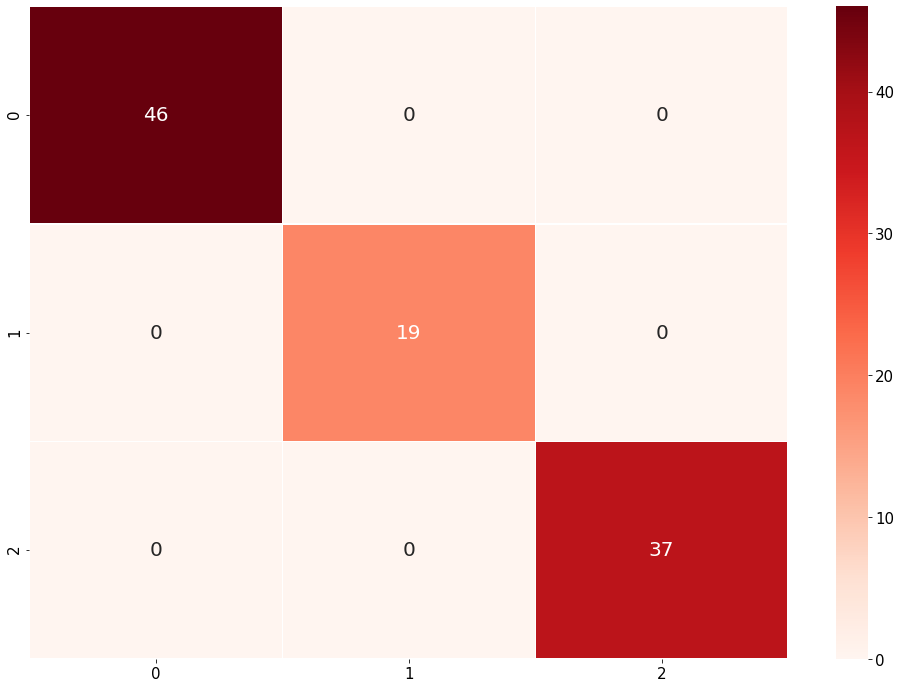

In [295]:
sns.heatmap( cm, annot=True, fmt='d', linewidths=0.2, cmap='Reds' , annot_kws={'size': 20})
           
plt.show()

#### F1 score

In [296]:
f1_score(y_true, y_pred, average='macro')

1.0

### Keras version

In [301]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [302]:
dense = Dense( units = 3, input_dim = 13, activation = 'softmax')
model = Sequential([dense])
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.1), metrics = ['acc'])
earlyStop = EarlyStopping(monitor = 'loss', min_delta = 0.01, patience = 100)
h = model.fit( x_train, y_train, epochs = 1000, validation_data= (x_valid, y_valid), callbacks= [earlyStop])

Epoch 1/1000
6/6 [==============================] - 0s 20ms/step - loss: 0.9607 - acc: 0.5638 - val_loss: 0.6466 - val_acc: 0.7021
Epoch 2/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.4959 - acc: 0.7766 - val_loss: 0.3817 - val_acc: 0.9362
Epoch 3/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.3285 - acc: 0.9628 - val_loss: 0.3102 - val_acc: 0.9787
Epoch 4/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.2405 - acc: 0.9681 - val_loss: 0.2275 - val_acc: 0.9362
Epoch 5/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.1900 - acc: 0.9734 - val_loss: 0.1921 - val_acc: 0.9574
Epoch 6/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.1613 - acc: 0.9787 - val_loss: 0.1537 - val_acc: 0.9574
Epoch 7/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.1346 - acc: 0.9840 - val_loss: 0.1331 - val_acc: 1.0000
Epoch 8/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.1288 - acc: 0.9

6/6 [==============================] - 0s 4ms/step - loss: 0.0149 - acc: 1.0000 - val_loss: 0.0259 - val_acc: 1.0000
Epoch 64/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.0149 - acc: 1.0000 - val_loss: 0.0247 - val_acc: 1.0000
Epoch 65/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.0143 - acc: 1.0000 - val_loss: 0.0246 - val_acc: 1.0000
Epoch 66/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.0140 - acc: 1.0000 - val_loss: 0.0258 - val_acc: 1.0000
Epoch 67/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.0142 - acc: 1.0000 - val_loss: 0.0241 - val_acc: 1.0000
Epoch 68/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.0137 - acc: 1.0000 - val_loss: 0.0245 - val_acc: 1.0000
Epoch 69/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.0137 - acc: 1.0000 - val_loss: 0.0258 - val_acc: 1.0000
Epoch 70/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.0134 - acc: 1.0000 - v

6/6 [==============================] - 0s 3ms/step - loss: 0.0068 - acc: 1.0000 - val_loss: 0.0169 - val_acc: 1.0000
Epoch 126/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.0068 - acc: 1.0000 - val_loss: 0.0161 - val_acc: 1.0000
Epoch 127/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.0066 - acc: 1.0000 - val_loss: 0.0170 - val_acc: 1.0000
Epoch 128/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.0067 - acc: 1.0000 - val_loss: 0.0188 - val_acc: 1.0000
Epoch 129/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.0066 - acc: 1.0000 - val_loss: 0.0170 - val_acc: 1.0000
Epoch 130/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.0064 - acc: 1.0000 - val_loss: 0.0168 - val_acc: 1.0000
Epoch 131/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.0064 - acc: 1.0000 - val_loss: 0.0164 - val_acc: 1.0000
Epoch 132/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.0063 - acc: 1.0

#### 매개변수 확인

In [303]:
w,b=dense.get_weights()
print(w,b)

[[-12.656665    10.410239     3.8805807 ]
 [  5.2781925   -1.0932802   -5.2491717 ]
 [ -6.7956424    1.6636463    4.84468   ]
 [ -1.3482188   -4.2394733    3.9170015 ]
 [  1.0529876    1.2506328   -3.4752796 ]
 [ -4.6015244    5.2114367   -2.7784076 ]
 [  1.2282506   -3.1598017    1.1618458 ]
 [  1.2372853    1.2479436   -2.6793394 ]
 [  2.8329282   -2.535504    -2.8012898 ]
 [  1.7828192   -0.7716926   -0.43053165]
 [  3.0089517   -1.8220909   -0.29004446]
 [  1.3203876   -1.4707283   -0.58758354]
 [  3.4399974   -3.4198678   -0.19381686]] [ 2.9625113  -2.503602    0.07941717]


#### Loss 시각화

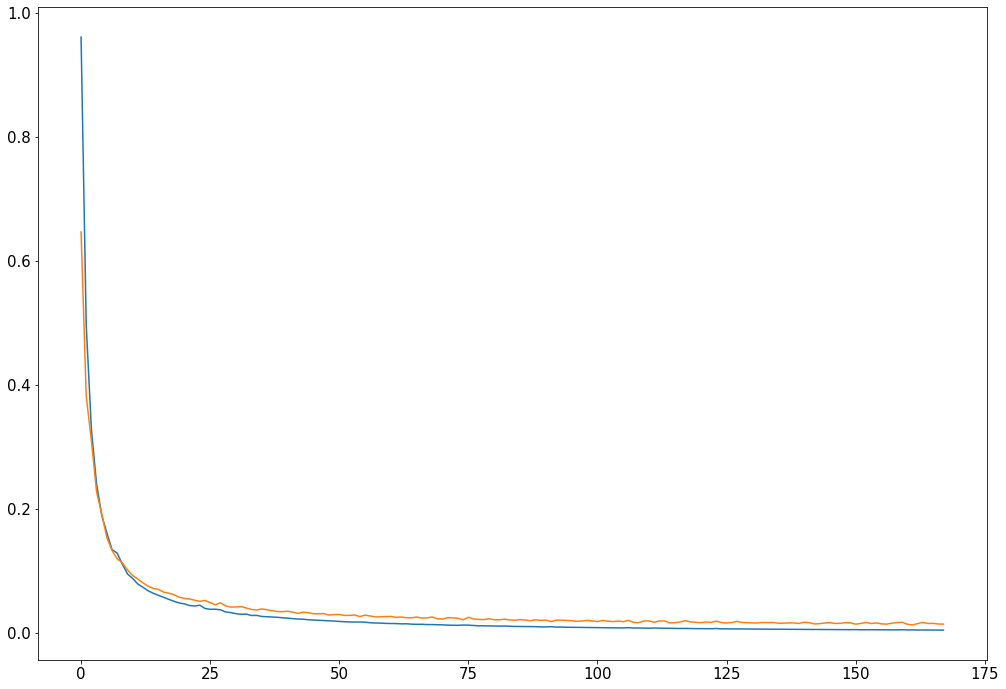

In [304]:
plt.plot( h.history['loss'] )
plt.plot( h.history['val_loss'] )
plt.show()

#### 정확도 시각화

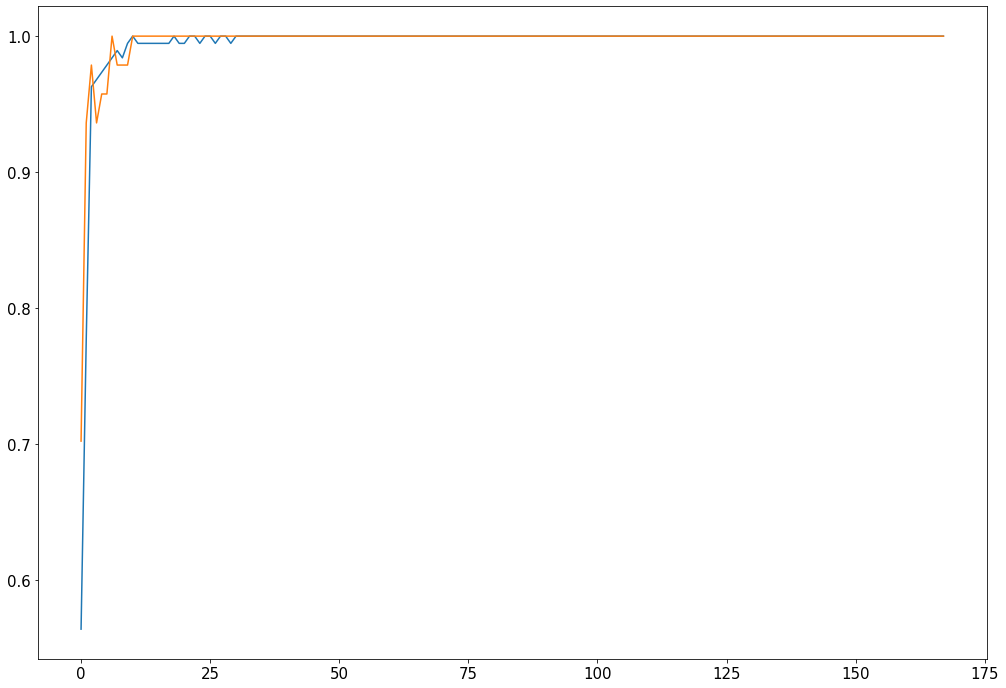

In [305]:
plt.plot( h.history['acc'] )
plt.plot( h.history['val_acc'] )
plt.show()

### 평가

#### 정확도

In [306]:
pred_y = model.predict(x_test).argmax(axis=1)
true_y = y_test.values.argmax(axis=1)

In [307]:
pred_y

array([0, 1, 0, 2, 0, 1, 2, 0, 1, 1, 2, 2, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0,
       0, 2, 2, 1, 2, 2, 0, 0, 2, 2, 1, 0, 0, 0, 0, 2, 0, 1, 1, 2, 0, 0,
       2, 1, 2, 0, 0, 0, 0, 2, 0, 1, 2, 2, 1, 0, 2, 0, 0, 2, 0, 0, 2, 0,
       0, 1, 0, 0, 2, 2, 0, 0, 0, 1, 1, 2, 1, 0, 0, 2, 2, 2, 2, 2, 0, 1,
       2, 0, 0, 2, 0, 2, 0, 0, 2, 1, 1, 2, 2, 2], dtype=int64)

In [308]:
true_y

array([0, 1, 0, 2, 0, 1, 2, 0, 1, 1, 2, 2, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0,
       0, 2, 2, 1, 2, 2, 0, 0, 2, 2, 1, 0, 0, 0, 0, 2, 0, 1, 1, 2, 0, 0,
       2, 1, 2, 0, 0, 0, 0, 2, 0, 1, 2, 2, 1, 0, 2, 0, 0, 2, 0, 0, 2, 0,
       0, 1, 0, 0, 2, 2, 0, 0, 0, 1, 1, 2, 1, 0, 0, 2, 2, 2, 2, 2, 0, 1,
       2, 0, 0, 2, 0, 2, 0, 0, 2, 1, 1, 2, 2, 2], dtype=int64)

In [309]:
accuracy_score(true_y, pred_y)

1.0

#### confusion Matrix

In [310]:
cm1=confusion_matrix(true_y, pred_y)
cm1

array([[46,  0,  0],
       [ 0, 19,  0],
       [ 0,  0, 37]], dtype=int64)

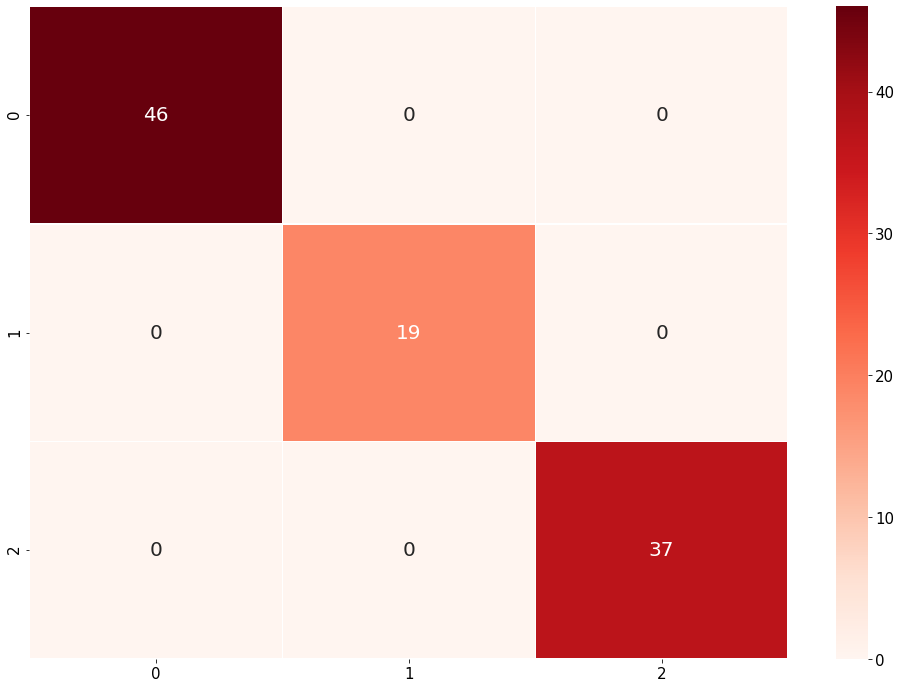

In [311]:
sns.heatmap( cm1, annot=True, fmt='d', linewidths=0.2, cmap='Reds', annot_kws={'size':20} )
plt.show()

#### f1 score

In [312]:
f1_score(true_y, pred_y, average='macro')

1.0